# Exploratory data analysis

___

### Import Libraries

In [1]:
# import the necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# folium to plot geographical map with heatmap
import folium
from folium.plugins import HeatMap

%matplotlib inline

___

### Function to extract longtidue and latitude from dataframe for folium plot

In [2]:
# to separate columns and create new dataframe
def separate_columns(df, col1, col2):
    new_df = df[[col1, col2]]
    return new_df

___

### Import Cleaned Dataset

In [3]:
# import cleaned train dataset and assign to a dataframe
df_EDA = pd.read_csv('../datasets/train_cleaned.csv', index_col=0, low_memory=False)

# import cleaned test dataset and assign to a dataframe
df_test = pd.read_csv('../datasets/test_cleaned.csv', index_col=0, low_memory=False)

# set max_rows and max_columns to enable readability
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

___

### Create a "remaining_lease" column and drop "hdb_age"

- Although similar in meaning, buyers would be more keen to know the remaining lease.

In [4]:
# create a new feature for remaining lease
df_EDA['remaining_lease']= 99 - df_EDA['hdb_age']
df_test['remaining_lease']= 99 - df_test['hdb_age']

In [5]:
# drop hdb_age
df_EDA.drop(columns=["hdb_age"], inplace=True)
df_test.drop(columns=["hdb_age"], inplace=True)

___

### Export for Machine Learning

In [6]:
# export the new test_cleaned.csv for machine learning later
df_test.to_csv('../datasets/ML_test.csv')

In [7]:
# export the new train_cleaned.csv for machine learning later
df_EDA.to_csv('../datasets/ML_train.csv')

___

### Prepare Coordinates for Folium

In [8]:
# extract latitude and longitude to a new dataframe for folium plot
df_hdb_coords = separate_columns(df_EDA, 'Latitude', 'Longitude')
# df_hdb_coords = df_hdb_coords.rename(columns={'Latitude': 'latitude', 'Longitude' : 'longitude'})

___

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|town|object||HDB township where the flat is located, e.g. BUKIT MERAH|
|flat_type|object||type of the resale flat unit, e.g. 3 ROOM|
|resale_price|float64||the property's sale price in Singapore dollars|
|Tranc_Year|int64||year of resale transaction|
|Tranc_Month|int64||month of resale transaction|
|floor_area_sqft|float64||floor area of the resale flat unit in square feet|
|max_floor_lvl|int64||highest floor of the resale flat|
|1room_sold|int64||number of 1-room residential units in the resale flat|
|2room_sold|int64||number of 2-room residential units in the resale flat|
|3room_sold|int64||number of 3-room residential units in the resale flat|
|4room_sold|int64||number of 4-room residential units in the resale flat|
|5room_sold|int64||number of 5-room residential units in the resale flat|
|exec_sold|int64||number of executive type residential units in the resale flat block|
|multigen_sold|int64||number of multi-generational type residential units in the resale flat block|
|studio_apartment_sold|int64||number of studio apartment type residential units in the resale flat block|
|Latitude|float64||Latitude based on postal code|
|Longitude|float64||Longitude based on postal code|
|Mall_Nearest_Distance|float64||distance (in metres) to the nearest mall|
|Hawker_Nearest_Distance|float64||distance (in metres) to the nearest hawker centre|
|mrt_nearest_distance|float64||distance (in metres) to the nearest MRT station|
|bus_stop_nearest_distance|float64||distance (in metres) to the nearest bus stop|
|pri_sch_nearest_distance|float64||distance (in metres) to the nearest primary school|
|sec_sch_nearest_distance|float64||distance (in metres) to the nearest secondary school|
|remaining_lease|int64||number of years remaining on the original 99-year leasehold agreement for the property|

___

## Commence EDA

___

### Summary Statistics

In [9]:
# summary statistics
df_EDA.describe()

resale_price     Tranc_Year    Tranc_Month  floor_area_sqft  \
count  1.506340e+05  150634.000000  150634.000000    150634.000000   
mean   4.491615e+05    2016.489551       6.580500      1045.763466   
std    1.433076e+05       2.752396       3.345468       262.696634   
min    1.500000e+05    2012.000000       1.000000       333.000000   
25%    3.470000e+05    2014.000000       4.000000       807.000000   
50%    4.200000e+05    2017.000000       7.000000      1022.000000   
75%    5.200000e+05    2019.000000       9.000000      1205.000000   
max    1.258000e+06    2021.000000      12.000000      3013.000000   

       max_floor_lvl     1room_sold     2room_sold     3room_sold  \
count  150634.000000  150634.000000  150634.000000  150634.000000   
mean       15.139816       0.138813       1.782055      39.219366   
std         6.232492       5.947970      11.713826      68.748273   
min         2.000000       0.000000       0.000000       0.000000   
25%        12.000000       0.000000       0.000000       0.000000   
50%        13.000000       0.000000       0.000000       0.000000   
75%        16.000000       0.000000       0.000000      66.000000   
max        50.000000     255.000000     225.000000     528.000000   

          4room_sold     5room_sold      exec_sold  multigen_sold  \
count  150634.000000  150634.000000  150634.000000  150634.000000   
mean       50.083978      26.299853       5.940770       0.023972   
std        45.302101      33.456575      19.131872       1.135483   
min         0.000000       0.000000       0.000000       0.000000   
25%        14.000000       0.000000       0.000000       0.000000   
50%        44.000000       3.000000       0.000000       0.000000   
75%        73.000000      50.000000       0.000000       0.000000   
max       316.000000     164.000000     135.000000      66.000000   

       studio_apartment_sold       Latitude      Longitude  \
count          150634.000000  150634.000000  150634.000000   
mean                0.448564       1.366224     103.839391   
std                 5.350617       0.042850       0.072506   
min                 0.000000       1.270380     103.685228   
25%                 0.000000       1.336285     103.774859   
50%                 0.000000       1.363466     103.844907   
75%                 0.000000       1.393323     103.898808   
max               142.000000       1.457071     103.987804   

       Mall_Nearest_Distance  Hawker_Nearest_Distance  mrt_nearest_distance  \
count          150634.000000            150634.000000         150634.000000   
mean              663.901799              1173.700148            765.007872   
std               367.751216              1076.701337            429.366039   
min                 0.000000                 1.873295             21.971410   
25%               392.328485               372.132398            458.266301   
50%               602.818388               778.966980            682.621343   
75%               866.941448              1678.949229            975.734180   
max              3496.402910              4907.036414           3544.504228   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
count              150634.000000             150634.000000   
mean                  115.258966                395.172974   
std                    55.572855                234.760931   
min                     9.001285                 45.668324   
25%                    75.032491                227.083164   
50%                   107.765999                348.876691   
75%                   146.652409                502.179385   
max                   443.964584               3305.841039   

       sec_sch_nearest_dist  remaining_lease  
count         150634.000000    150634.000000  
mean             508.533220        70.448464  
std              309.066265        12.138829  
min               38.913475        44.000000  
25%              290.285883        62.000000  
50%              447

In [10]:
# dictionary combining column headers with their respective sd values
column_headers=df_EDA.columns[1:]
column_std_values=df_EDA.std()[1:]
sd = dict(zip(column_headers,column_std_values))

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79821/64934487.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_std_values=df_EDA.std()[1:]


In [11]:
sd

{'flat_type': 2.752396101397414,
 'resale_price': 3.345468301911617,
 'Tranc_Year': 262.6966340499087,
 'Tranc_Month': 6.232492339411379,
 'floor_area_sqft': 5.947970475689912,
 'max_floor_lvl': 11.713826178958849,
 '1room_sold': 68.74827335934788,
 '2room_sold': 45.30210092350463,
 '3room_sold': 33.45657469255514,
 '4room_sold': 19.131871750564247,
 '5room_sold': 1.1354831460838708,
 'exec_sold': 5.350617254685393,
 'multigen_sold': 0.0428504341367519,
 'studio_apartment_sold': 0.0725061709763566,
 'Latitude': 367.7512157128605,
 'Longitude': 1076.7013366254507,
 'Mall_Nearest_Distance': 429.3660390744885,
 'Hawker_Nearest_Distance': 55.572855441272516,
 'mrt_nearest_distance': 234.76093128028705,
 'bus_stop_nearest_distance': 309.0662646466676,
 'pri_sch_nearest_distance': 12.13882892230325}

___

### Correlation

In [12]:
corr_mat = df_EDA.corr(method='pearson')

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79821/2182547397.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_EDA.corr(method='pearson')


In [13]:
# filter correlation values above 0.9
sorted_mat = corr_mat.unstack().sort_values(ascending=False)
sorted_mat = sorted_mat.loc[sorted_mat > 0.9]

In [14]:
print(sorted_mat)

resale_price               resale_price                 1.0
multigen_sold              multigen_sold                1.0
floor_area_sqft            floor_area_sqft              1.0
max_floor_lvl              max_floor_lvl                1.0
1room_sold                 1room_sold                   1.0
2room_sold                 2room_sold                   1.0
3room_sold                 3room_sold                   1.0
4room_sold                 4room_sold                   1.0
5room_sold                 5room_sold                   1.0
exec_sold                  exec_sold                    1.0
studio_apartment_sold      studio_apartment_sold        1.0
Tranc_Year                 Tranc_Year                   1.0
Latitude                   Latitude                     1.0
Longitude                  Longitude                    1.0
Mall_Nearest_Distance      Mall_Nearest_Distance        1.0
Hawker_Nearest_Distance    Hawker_Nearest_Distance      1.0
mrt_nearest_distance       mrt_nearest_d

***Key Findings***
- A common trend derived from the above is that the latitudes and longitudes are correlated.
- This isn't surprising as the combination provides the exact coordinates for HDB flats.

___

### Distribution of HDB flats in Singapore

In [15]:
# Latitude and longitude of the center of Singapore
latitude = 1.3521
longitude = 103.8198

m = folium.Map(location=[latitude, longitude], zoom_start=12)

# Create a heatmap
HeatMap(data=df_hdb_coords[['Latitude', 'Longitude']], radius=8, max_zoom=13).add_to(m)

# Show the map
m

***Key Findings***
- Singapore has done an excellent job for the geographical planning of HDB flats around the island as they are quite equally distributed.
- Certain areas highlighted in light green has lesser flats for future buyers to purchase from. (i.e. Punggol, Sengkang. Jurong West and Choa Chu Kang)

___

### Fluctuation in resale prices of flats based on flat types from 2012 to 2021

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79821/3567130748.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flats_sorted_by_year = df_EDA.groupby(['Tranc_Year','flat_type'],as_index=False).mean()


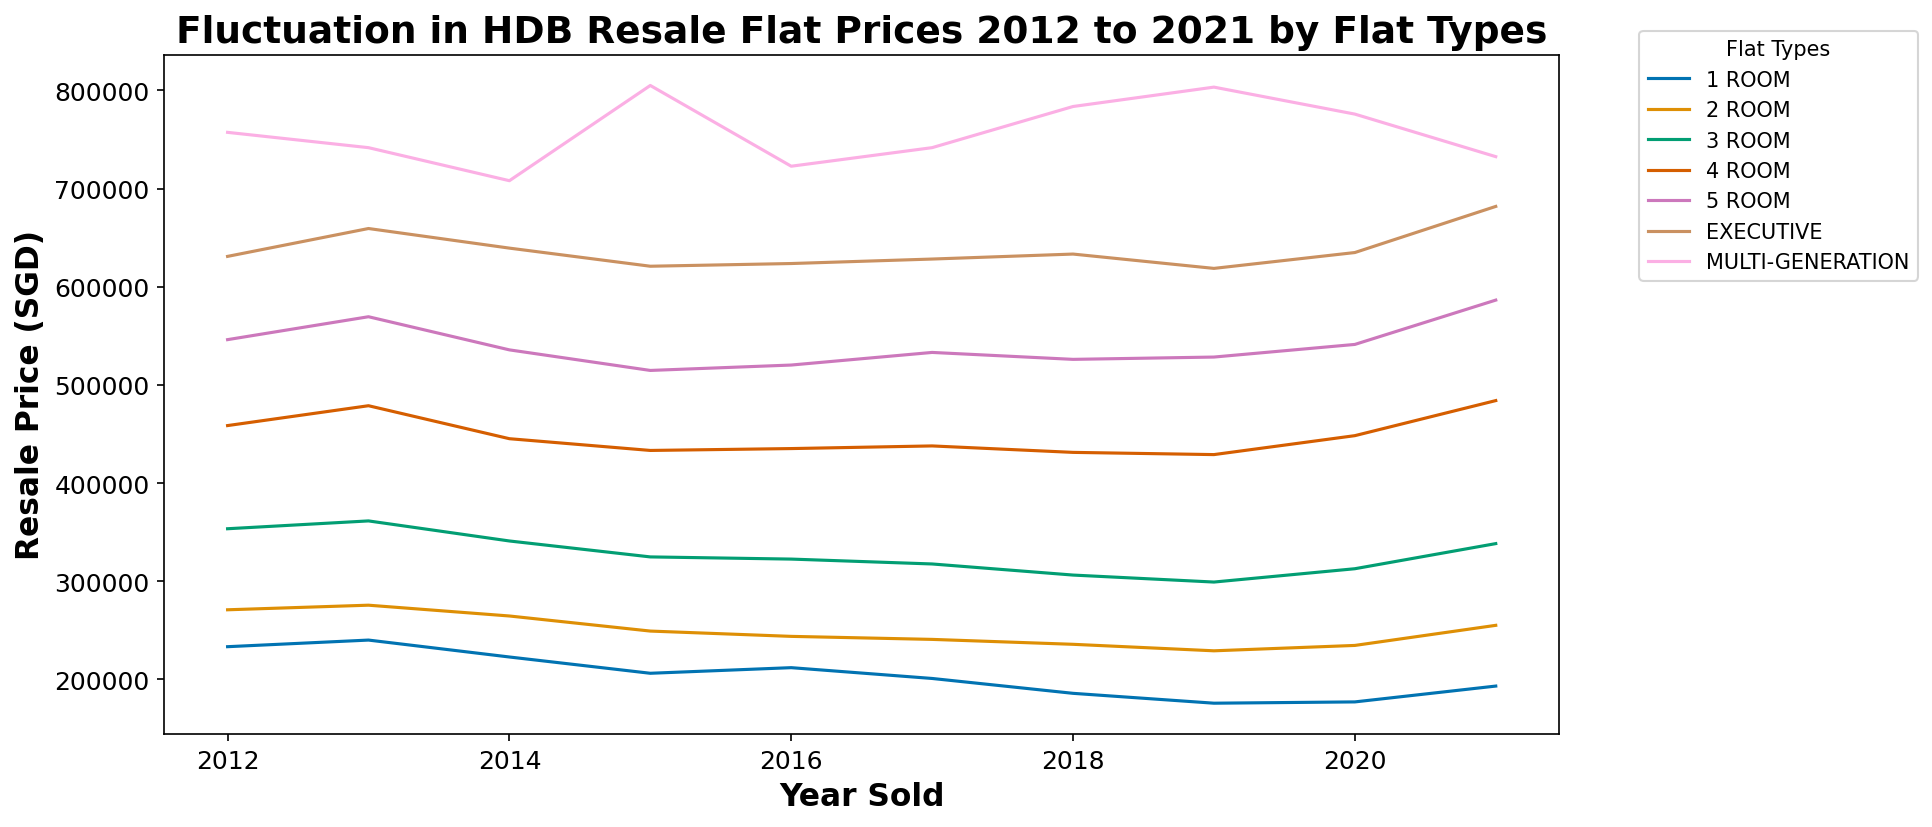

In [16]:
flats_sorted_by_year = df_EDA.groupby(['Tranc_Year','flat_type'],as_index=False).mean()

fig,ax = plt.subplots(figsize=(12,6),dpi=150)

sns.lineplot(data=flats_sorted_by_year,x='Tranc_Year',y='resale_price',hue='flat_type',palette='colorblind')
ax.set_ylabel(r"Resale Price (SGD)",fontsize=15,fontweight='bold')
ax.set_xlabel(r"Year Sold",fontsize=15,fontweight='bold')
ax.tick_params(axis='both',labelsize=12)
plt.title('Fluctuation in HDB Resale Flat Prices 2012 to 2021 by Flat Types',fontweight='bold',fontsize=18,loc='center')
#plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1.05),loc=2,title='Flat Types')

***Key Findings***
- Most flat types, except multi-generation flats, follows a similar trend for resale price.
- The difference in trend for resale price could be attributed to the eligibility of buyers to purchases these flats, which results in the fluctuation in demands.
- Buyers of these flats must be able to buy under the Public Scheme and to qualify, their family nuclei must consist of:
    - Married couple with one or both parents
    - Fiancé / Fiancée couples with one or both parents
    - Widow or widower with child, and one or both parents
    - Divorcee with child, and one or both parents
    - The parents must be registered as essential occupiers of the flat.
    - Essential occupiers cannot have another property under their name.
- With the price converging to that similar to executive flats, more buyers would prefer purchasing the latter due to the flexible buying criteria.


(source: https://stackedhomes.com/editorial/when-is-it-worth-buying-a-3gen-hdb-flat/#gs.orthcy)

___

### Remaining lease and its effect on the resale price

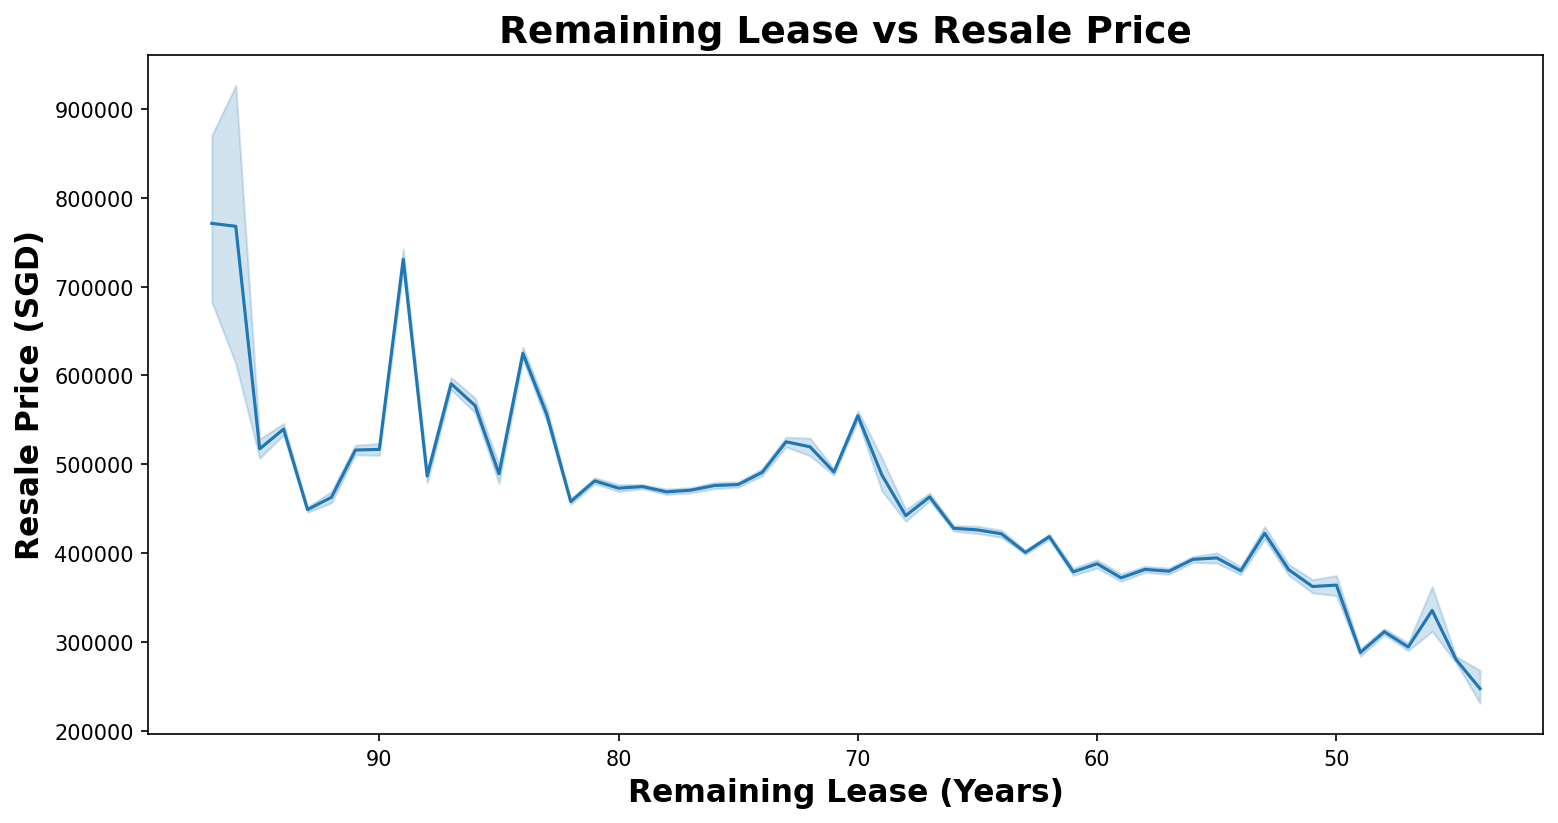

In [17]:
fig, ax = plt.subplots(figsize=(12,6),dpi=150)
sns.lineplot(x="remaining_lease", y="resale_price", data=df_EDA)

plt.title("Remaining Lease vs Resale Price", fontweight='bold',fontsize=18,loc='center')
ax.set_ylabel(r"Resale Price (SGD)",fontsize=15,fontweight='bold')
ax.set_xlabel(r"Remaining Lease (Years)",fontsize=15,fontweight='bold')

ax.set_xlim(ax.get_xlim()[::-1])

plt.show()

***Key Findings***
- HDB resale prices are higher for flats with a longer remaining lease.
- Unsurprisingly, the price of the resale flat depreciates as the age of the flat increases.
- Fluctuation in resale prices is affected by market conditions - state of economy and interest rates.

___

### Average resale price of flats in different towns

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79821/511914629.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flats_sorted = df_EDA.groupby('town',as_index=False).mean().sort_values('resale_price',ascending=False)
/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79821/511914629.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,.1,.2,.3,.4,.5,.6,.7])


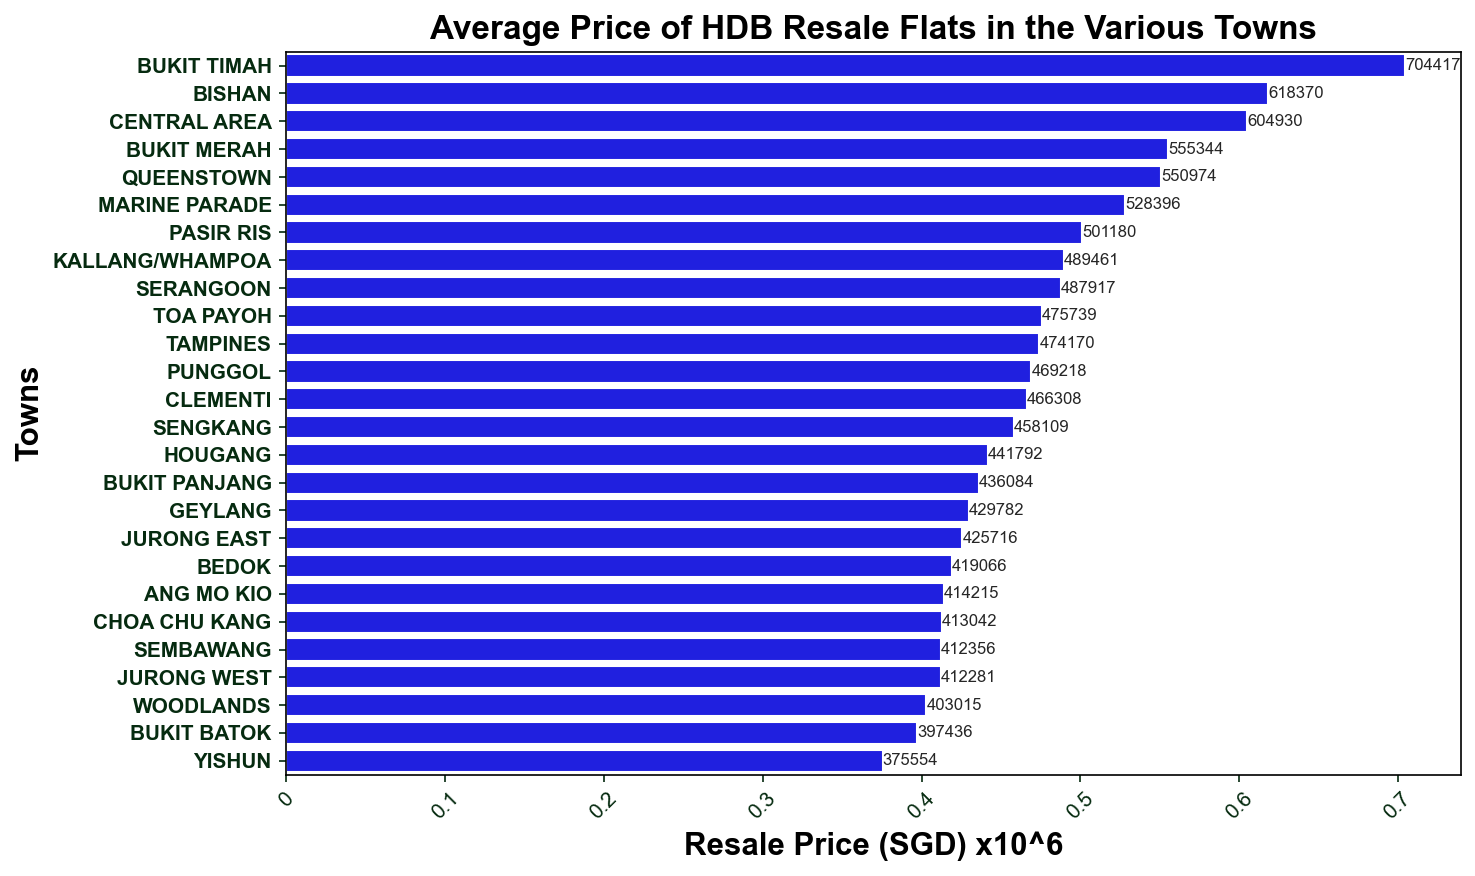

In [18]:
flats_sorted = df_EDA.groupby('town',as_index=False).mean().sort_values('resale_price',ascending=False)

fig,ax = plt.subplots(figsize=(10,6),dpi=150)
sns.set(style='darkgrid')
sns.barplot(data=flats_sorted,y='town',x='resale_price',estimator=np.mean,ci=None,orient='h',color='#0000FF')
ax.bar_label(ax.containers[0],fontsize=8)
ax.set_xlabel(r"Resale Price (SGD) x10^6",fontsize=15,fontweight='bold')
ax.set_ylabel(r"Towns",fontsize=15,fontweight='bold')
ax.set_xticklabels([0,.1,.2,.3,.4,.5,.6,.7])
ax.tick_params(axis='both',labelsize=10,colors='#062b10')
plt.xticks(rotation=45)
plt.yticks(weight='bold')
plt.title('Average Price of HDB Resale Flats in the Various Towns',fontweight='bold',fontsize=16,loc='center')
plt.tight_layout()

***Key Findings***
- Bukit Timah, Bishan and Bukit Merah has the highest average resale prices for their flat
- Woodlands, Bukit Batok and Yishun has the lowest average resale prices for their flats.

___

### Volume of Flat Types

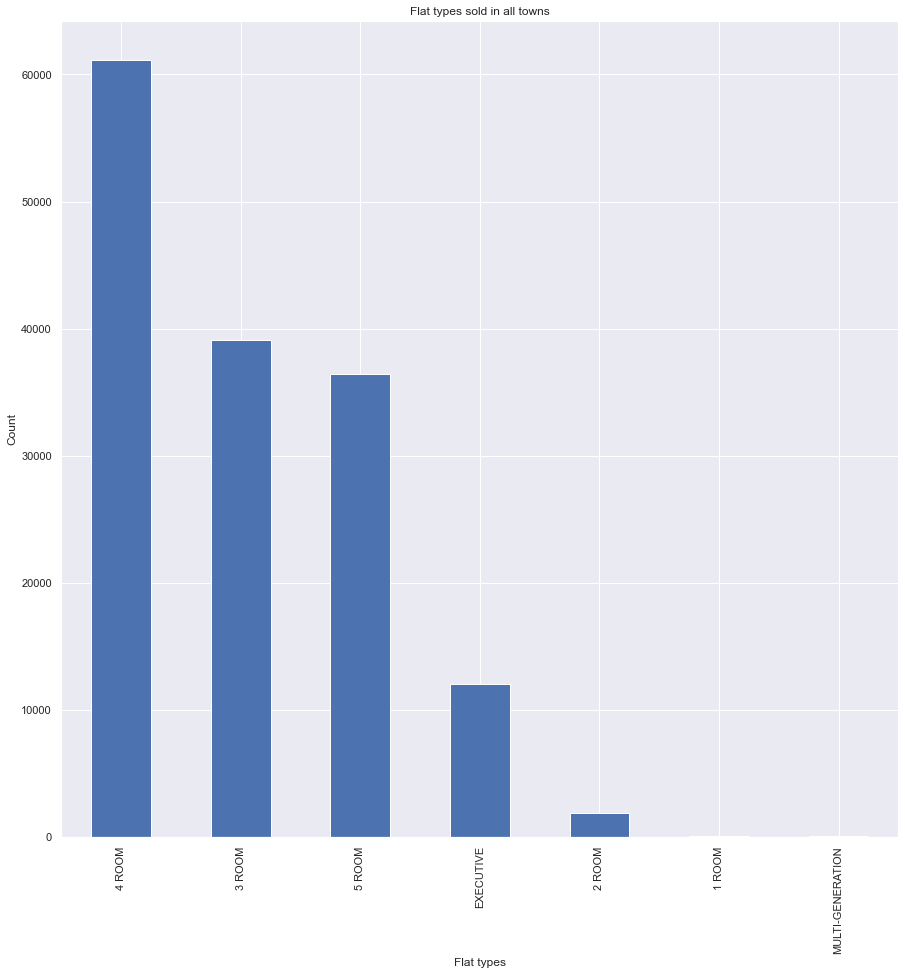

In [19]:
plt.figure(figsize=(15, 15))
df_EDA['flat_type'].value_counts().plot(kind='bar')
plt.title('Flat types sold in all towns')
plt.xlabel('Flat types')
plt.ylabel('Count');

***Key Findings***
- 4 room flats are the most readily flats in the resale market.
- Multi-generation flats are not as readily available probably due to its stringent eligbility criterias.

___

### Floor area and its effect on the resale price

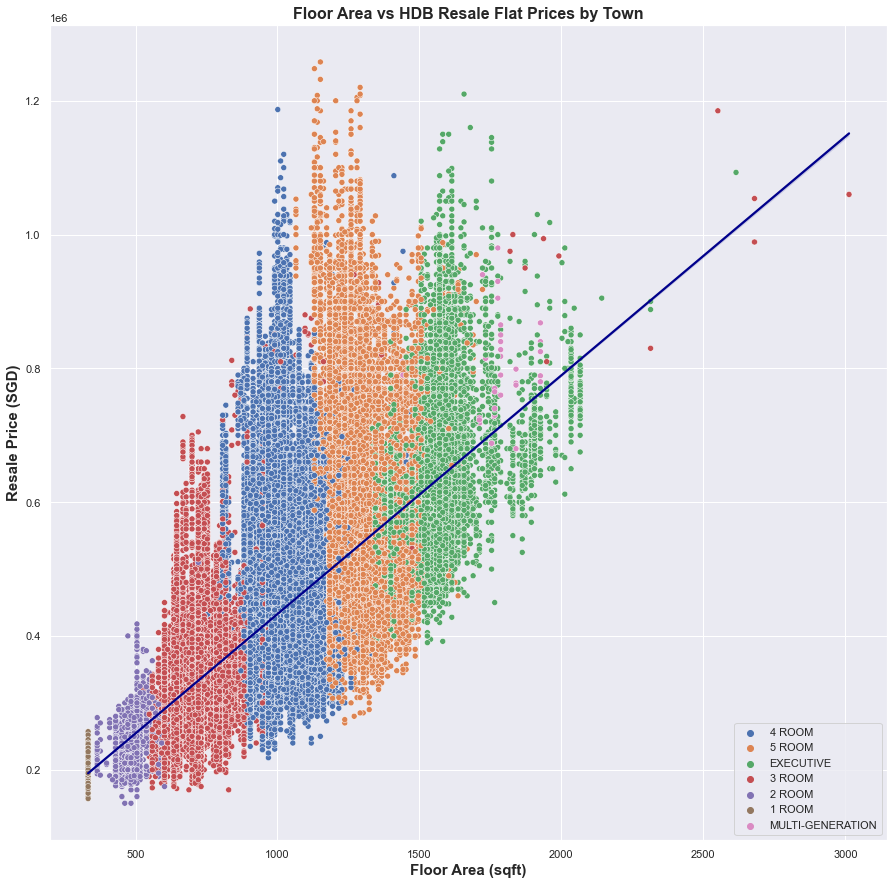

In [20]:
sns.scatterplot(x="floor_area_sqft", y="resale_price", hue="flat_type", data=df_EDA)

sns.regplot(x="floor_area_sqft", y="resale_price", data=df_EDA, scatter=False, color='darkblue')

plt.xlabel("Floor Area (sqft)", fontsize=15, weight='bold')
plt.ylabel("Resale Price (SGD)", fontsize=15, weight='bold')

plt.title("Floor Area vs HDB Resale Flat Prices by Town", fontsize=16, weight='bold')

plt.gcf().set_size_inches(15, 15)

plt.legend(loc="lower right")

plt.show()

***Key Findings***
- A consistent trend is observed - as the floor area increase, the resale price increases proportionally.

___

### Max floor level and its effect on the resale price

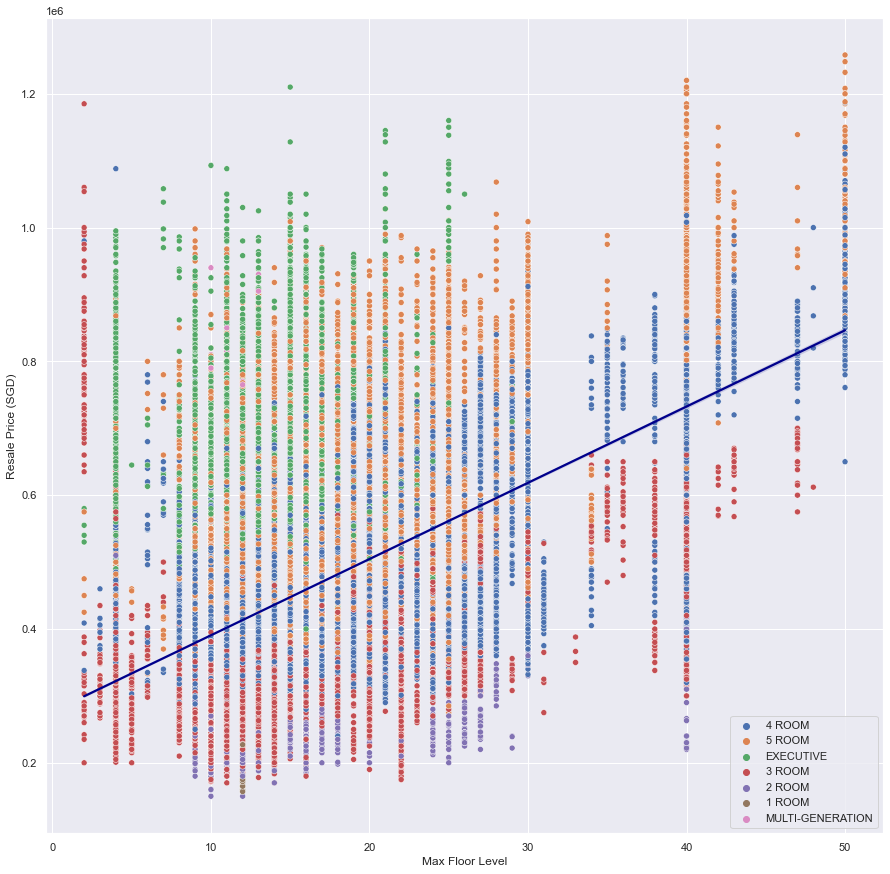

In [21]:
fig = plt.figure(figsize=(15, 15))

sns.scatterplot(x='max_floor_lvl', y='resale_price', hue="flat_type", data=df_EDA)

sns.regplot(x="max_floor_lvl", y="resale_price", data=df_EDA, scatter=False, color='darkblue')

plt.xlabel("Max Floor Level")
plt.ylabel("Resale Price (SGD)")

plt.legend(loc="lower right")

plt.show()

***Key Findings***
- Resale prices of flats increases as the max floor level increases.
- The data points are spread out quite randomly which suggests there is little to no correlation.

___

### MRT nearest distance and its effect on the resale price

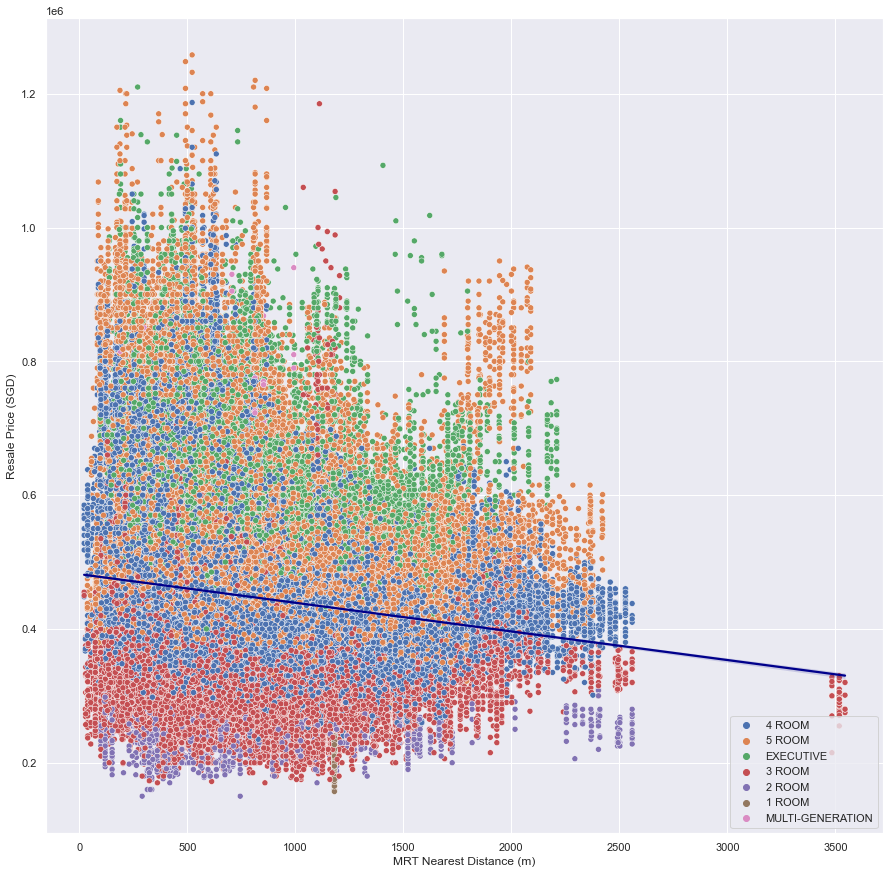

In [22]:
fig = plt.figure(figsize=(15, 15))

sns.scatterplot(x='mrt_nearest_distance', y='resale_price', hue="flat_type", data=df_EDA)
sns.regplot(x="mrt_nearest_distance", y="resale_price", data=df_EDA, scatter=False, color='darkblue')

plt.xlabel("MRT Nearest Distance (m)")
plt.ylabel("Resale Price (SGD)")

plt.legend(loc="lower right")

plt.show()

***Key Findings***
- Nearer the resale flats are to an MRT station, the higher the hdb resale price.
- Resale price of flats tend to decline if the flat is located further away from an MRT station.
- Higher datapoints are located on the left of the graph which supports the research that flats located near ammenities such as MRT stations tend to command a higher resale price.

___

### Bus stop nearest distance and its effect on the resale price

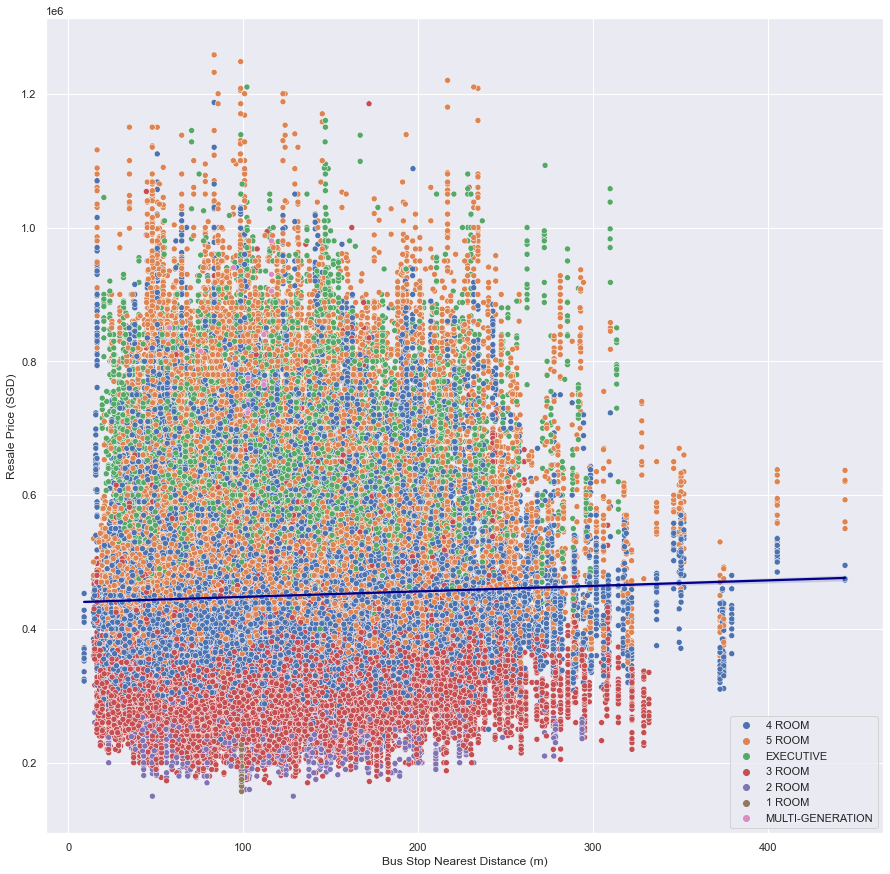

In [23]:
fig = plt.figure(figsize=(15, 15))

sns.scatterplot(x='bus_stop_nearest_distance', y='resale_price', hue="flat_type", data=df_EDA)

sns.regplot(x="bus_stop_nearest_distance", y="resale_price", data=df_EDA, scatter=False, color='darkblue')

plt.xlabel("Bus Stop Nearest Distance (m)")
plt.ylabel("Resale Price (SGD)")

plt.legend(loc="lower right")

plt.show()

***Key Findings***
- Points in the plot are spread out randomly and no clear pattern can be drawn.
- This indicates there is no strong correlation between the Bus Stop Nearest Distance and Resale Price.
- The trend line is relatively horizontal which indicates no strong correlation.

___

### Mall nearest distance and its effect on the resale price

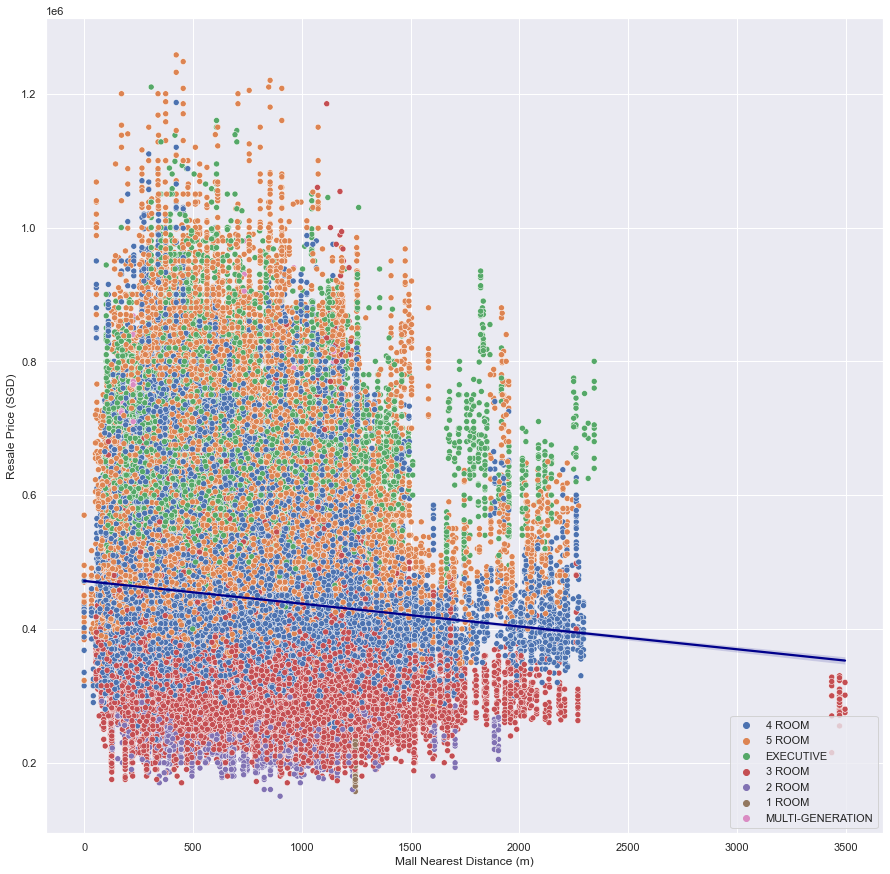

In [24]:
fig = plt.figure(figsize=(15, 15))

sns.scatterplot(x='Mall_Nearest_Distance', y='resale_price', hue="flat_type", data=df_EDA)

sns.regplot(x="Mall_Nearest_Distance", y="resale_price", data=df_EDA, scatter=False, color='darkblue')

plt.xlabel("Mall Nearest Distance (m)")
plt.ylabel("Resale Price (SGD)")

plt.legend(loc="lower right")
plt.show()

***Key Findings***
- Similar to the analysis on MRT Nearest Distance, the resale prices tends to be higher for flats located closer to malls.
- Majority of resale flats are located within 1.5km of their nearest malls.

___

### Primary school nearest distance and its effect on the resale price

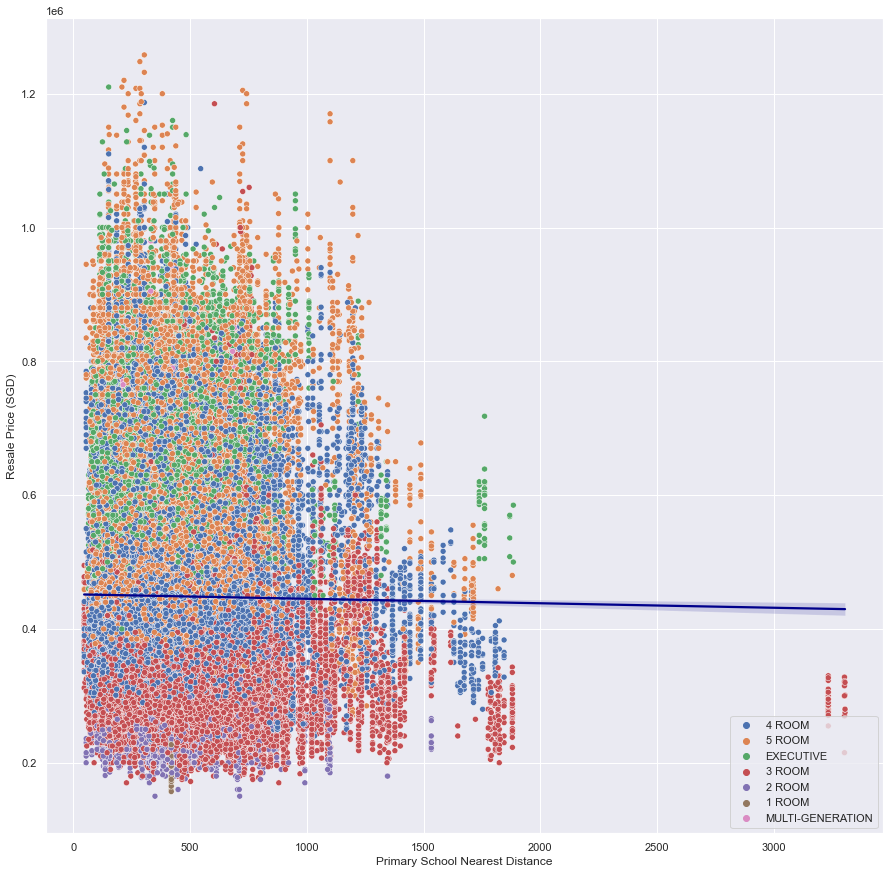

In [25]:
fig = plt.figure(figsize=(15, 15))

sns.scatterplot(x='pri_sch_nearest_distance', y='resale_price', hue="flat_type", data=df_EDA)

sns.regplot(x="pri_sch_nearest_distance", y="resale_price", data=df_EDA, scatter=False, color='darkblue')

plt.xlabel("Primary School Nearest Distance")
plt.ylabel("Resale Price (SGD)")

plt.legend(loc="lower right")
plt.show()

***Key Findings***
- Resale prices of flats tend to be higher for flats located closer to primary schools.
- However, there is no strong correlation between the resale price and nearest distance to primary schools.

___

### Secondary school nearest distance and its effect on the resale price

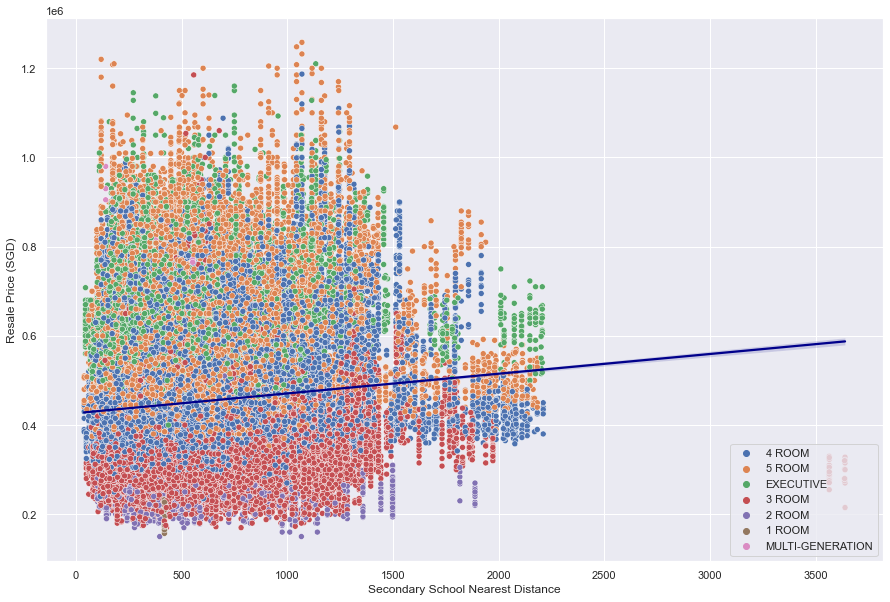

In [26]:
fig = plt.figure(figsize=(15, 10))

sns.scatterplot(x='sec_sch_nearest_dist', y='resale_price', hue="flat_type", data=df_EDA)

sns.regplot(x="sec_sch_nearest_dist", y="resale_price", data=df_EDA, scatter=False, color='darkblue')

plt.xlabel("Secondary School Nearest Distance")
plt.ylabel("Resale Price (SGD)")

plt.legend(loc="lower right")

plt.show()

***Key Findings***
- Majority of resale flats has a secondary school within 1.5km.
- Interestingly, the resale prices of hdb flats increases the further it is from a secondary school.
- This could be due to other attributes such as:
    - Location preference: Being aware from secondary schools may offer peace and quiet, larger living spaces.
    - Ammenitites: There could be more ammenities in areas away from secondary school such as parks, shopping centers, entertainment venues.

___

### Area with the most expensive and cheapest resale flat

In [27]:
df_EDA[df_EDA['resale_price']==df_EDA['resale_price'].max()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
82860  CENTRAL AREA    5 ROOM     1258000.0        2020            9   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
82860             1151             50           0           0           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
82860         176          88          0              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
82860                      0  1.277799  103.841403             423.099896   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
82860               238.119379            522.021707   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
82860                  83.331455                303.577712   

       sec_sch_nearest_dist  remaining_lease  
82860           1069.437452               89

- The most expensive flats that were sold were in CENTRAL AREA. The 5 room flat was sold for SGD$1.258 million.

In [28]:
df_EDA[df_EDA['resale_price']==df_EDA['resale_price'].min()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
81423    GEYLANG    2 ROOM      150000.0        2019           10   
88670  TOA PAYOH    2 ROOM      150000.0        2020            1   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
81423              484             10           0          36          18   
88670              462             12           0          78           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
81423           0           0          0              0   
88670           0           0          0              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
81423                      0  1.325468  103.888077             901.059134   
88670                      0  1.338249  103.852482             900.490174   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
81423               287.904607            290.668099   
88670               244.451943            744.540267   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
81423                 128.565839                712.127583   
88670                  48.028582                349.268872   

       sec_sch_nearest_dist  remaining_lease  
81423           1066.722276               47  
88670            396.502532               61

- The cheapest flats that were sold were in Geylang and Toa Payoh. The 2 room flats were sold for $150,000.

___

### Most expensive and cheapest flat based on flat type

In [29]:
# filters for each flat type
df_1rm = df_EDA[df_EDA['flat_type']=='1 ROOM']
df_2rm = df_EDA[df_EDA['flat_type']=='2 ROOM']
df_3rm = df_EDA[df_EDA['flat_type']=='3 ROOM']
df_4rm = df_EDA[df_EDA['flat_type']=='4 ROOM']
df_5rm = df_EDA[df_EDA['flat_type']=='5 ROOM']
df_exec = df_EDA[df_EDA['flat_type']=='EXECUTIVE']
df_multig = df_EDA[df_EDA['flat_type']=='MULTI-GENERATION']

In [30]:
# 1 room flat max
df_1rm[df_1rm['resale_price']==df_1rm['resale_price'].max()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
11583  BUKIT MERAH    1 ROOM      257000.0        2013            8   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
11583              333             12         255           0           2   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
11583           0           0          0              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
11583                      0  1.278361  103.819384            1246.092272   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
11583               125.006922           1180.622358   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
11583                  99.027522                418.947636   

       sec_sch_nearest_dist  remaining_lease  
11583            418.947636               53

In [31]:
# 1 room flat min
df_1rm[df_1rm['resale_price']==df_1rm['resale_price'].min()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
99886  BUKIT MERAH    1 ROOM      157000.0        2020            2   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
99886              333             12         255           0           2   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
99886           0           0          0              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
99886                      0  1.278361  103.819384            1246.092272   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
99886               125.006922           1180.622358   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
99886                  99.027522                418.947636   

       sec_sch_nearest_dist  remaining_lease  
99886            418.947636               53

In [32]:
# 2 room flat max
df_2rm[df_2rm['resale_price']==df_2rm['resale_price'].max()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
147001  BUKIT MERAH    2 ROOM      510000.0        2021            1   

        floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
147001              721              4           0           8           8   

        4room_sold  5room_sold  exec_sold  multigen_sold  \
147001           0           0          0              0   

        studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
147001                      0   1.28442  103.831057             489.577578   

        Hawker_Nearest_Distance  mrt_nearest_distance  \
147001                155.33401            475.460364   

        bus_stop_nearest_distance  pri_sch_nearest_distance  \
147001                 215.785445                545.665408   

        sec_sch_nearest_dist  remaining_lease  
147001            703.636604               51

In [33]:
# 2 room flat min
df_2rm[df_2rm['resale_price']==df_2rm['resale_price'].min()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
81423    GEYLANG    2 ROOM      150000.0        2019           10   
88670  TOA PAYOH    2 ROOM      150000.0        2020            1   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
81423              484             10           0          36          18   
88670              462             12           0          78           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
81423           0           0          0              0   
88670           0           0          0              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
81423                      0  1.325468  103.888077             901.059134   
88670                      0  1.338249  103.852482             900.490174   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
81423               287.904607            290.668099   
88670               244.451943            744.540267   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
81423                 128.565839                712.127583   
88670                  48.028582                349.268872   

       sec_sch_nearest_dist  remaining_lease  
81423           1066.722276               47  
88670            396.502532               61

In [34]:
# 3 room flat max
df_3rm[df_3rm['resale_price']==df_3rm['resale_price'].max()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
60635  KALLANG/WHAMPOA    3 ROOM     1185000.0        2018            9   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
60635             2551              2           0           0           8   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
60635           0           0          0              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
60635                      0  1.327014  103.856571            1114.727352   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
60635                   460.93           1111.216882   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
60635                 171.867389                604.159831   

       sec_sch_nearest_dist  remaining_lease  
60635            557.318067               50

In [35]:
# 3 room flat min
df_3rm[df_3rm['resale_price']==df_3rm['resale_price'].min()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
25778   SERANGOON    3 ROOM      170000.0        2018            4   
108053  TOA PAYOH    3 ROOM      170000.0        2019            5   

        floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
25778               688             14           0           0         115   
108053              828             11           0           0         205   

        4room_sold  5room_sold  exec_sold  multigen_sold  \
25778            0           3          0              0   
108053           0           7          0              0   

        studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
25778                       0  1.350475  103.876133             447.691145   
108053                      0  1.335341  103.854859             933.550727   

        Hawker_Nearest_Distance  mrt_nearest_distance  \
25778               1446.603458            361.387446   
108053               223.632331            858.996555   

        bus_stop_nearest_distance  pri_sch_nearest_distance  \
25778                  136.721313                879.826567   
108053                 114.795873                227.103188   

        sec_sch_nearest_dist  remaining_lease  
25778             428.309600               56  
108053            781.544006               48

In [36]:
# 4 room flat max
df_4rm[df_4rm['resale_price']==df_4rm['resale_price'].max()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
8559  CENTRAL AREA    4 ROOM     1186888.0        2020            6   

      floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
8559             1001             50           0           0           0   

      4room_sold  5room_sold  exec_sold  multigen_sold  studio_apartment_sold  \
8559         176          88          0              0                      0   

      Latitude   Longitude  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
8559  1.277799  103.841403             423.099896               238.119379   

      mrt_nearest_distance  bus_stop_nearest_distance  \
8559            522.021707                  83.331455   

      pri_sch_nearest_distance  sec_sch_nearest_dist  remaining_lease  
8559                303.577712           1069.437452               89

In [37]:
# 4 room flat min
df_4rm[df_4rm['resale_price']==df_4rm['resale_price'].min()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
51222  WOODLANDS    4 ROOM      218000.0        2020            3   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
51222              968             13           0           0           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
51222         120           0          0              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
51222                      0  1.441345  103.777183             911.877879   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
51222               292.591011           1019.060429   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
51222                   82.28108                861.675376   

       sec_sch_nearest_dist  remaining_lease  
51222            383.127749               54

In [38]:
# 5 room flat max
df_5rm[df_5rm['resale_price']==df_5rm['resale_price'].max()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
82860  CENTRAL AREA    5 ROOM     1258000.0        2020            9   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
82860             1151             50           0           0           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
82860         176          88          0              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
82860                      0  1.277799  103.841403             423.099896   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
82860               238.119379            522.021707   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
82860                  83.331455                303.577712   

       sec_sch_nearest_dist  remaining_lease  
82860           1069.437452               89

In [39]:
# 5 room flat min
df_5rm[df_5rm['resale_price']==df_5rm['resale_price'].min()]

town flat_type  resale_price  Tranc_Year  Tranc_Month  \
16190  WOODLANDS    5 ROOM      270000.0        2019            9   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
16190             1237             25           0           0           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
16190           0          96          0              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
16190                      0  1.444983  103.771721            1551.342988   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
16190               626.149201           1382.536095   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
16190                 205.148052                 1194.6484   

       sec_sch_nearest_dist  remaining_lease  
16190            715.077237               55

In [40]:
# executive flat max
df_exec[df_exec['resale_price']==df_exec['resale_price'].max()]

town  flat_type  resale_price  Tranc_Year  Tranc_Month  \
60261  BUKIT TIMAH  EXECUTIVE     1210000.0        2021            2   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
60261             1657             15           0           0           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
60261           0           0         78              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
60261                      0  1.339175  103.775341             308.176536   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
60261                73.061075            269.665543   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
60261                 102.076963                150.891461   

       sec_sch_nearest_dist  remaining_lease  
60261           1134.818249               66

In [41]:
# executive flat min
df_exec[df_exec['resale_price']==df_exec['resale_price'].min()]

town  flat_type  resale_price  Tranc_Year  Tranc_Month  \
77617  CHOA CHU KANG  EXECUTIVE      390000.0        2018            4   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
77617             1528              9           0           0           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
77617           0           0         48              0   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
77617                      0  1.391354  103.741893             174.657631   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
77617              3693.739446             677.99588   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
77617                 155.089152                447.889343   

       sec_sch_nearest_dist  remaining_lease  
77617            171.141388               73

In [42]:
# multi-generation flat max
df_multig[df_multig['resale_price']==df_multig['resale_price'].max()]

town         flat_type  resale_price  Tranc_Year  Tranc_Month  \
92128  BISHAN  MULTI-GENERATION      980000.0        2012            9   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
92128             1776             13           0           0           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
92128           0           0          0             48   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
92128                      0  1.344446  103.851798             735.771014   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
92128               543.199856            706.147439   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
92128                 116.092358                330.961028   

       sec_sch_nearest_dist  remaining_lease  
92128            140.935691               65

In [43]:
# multi
df_multig[df_multig['resale_price']==df_multig['resale_price'].min()]

town         flat_type  resale_price  Tranc_Year  Tranc_Month  \
91125  TAMPINES  MULTI-GENERATION      600000.0        2021            4   

       floor_area_sqft  max_floor_lvl  1room_sold  2room_sold  3room_sold  \
91125             1420             11           0           0           0   

       4room_sold  5room_sold  exec_sold  multigen_sold  \
91125           0           0          0             50   

       studio_apartment_sold  Latitude   Longitude  Mall_Nearest_Distance  \
91125                      0  1.357298  103.955006             1146.10828   

       Hawker_Nearest_Distance  mrt_nearest_distance  \
91125              1712.164832            188.716084   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
91125                  75.486872                681.957237   

       sec_sch_nearest_dist  remaining_lease  
91125            375.929348               65

***1 room flat***
- Most Expensive: Bukit Merah, $257,000

- Least Expensive: Bukit Merah, $157,000

***2 room flat***
- Most Expensive: Bukit Merah, $510,000

- Least Expensive: Bukit Merah and Toa Payoh, $150,000

***3 room flat***
- Most Expensive: Kallang/Whampoa and Queenstown, $780,000

- Least Expensive: Serangoon and Toa Payoh, $170,000

***4 room flat***
- Most Expensive: Clementi, $780,888

- Least Expensive: Woodlands, $218,000

***5 room flat***
- Most Expensive: Bukit Merah, $781,000

- Least Expensive: Woodlands, $270,000

***Executive flat***
- Most Expensive: Serangoon and Hougang, $781,000

- Least Expensive: Choa Chu Kang, $390,000

***Multi-generation flat***
- Most Expensive: Yishun, $770,000

- Least Expensive: Tampines, $600,000